In [119]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [120]:
esport = pd.read_csv('ESport_Earnings.csv', encoding='latin-1')
esport.head()

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011


Exploration

In [121]:
#Let's look at the last 25 years only
esport = esport.drop(esport[esport['Releaseyear'] < 1998].index)
esport.shape

(483, 9)

In [122]:
#Checking null values
esport.isnull().sum()
#Highly workable dataset

IdNo                    0
TotalMoney              0
GameName                0
Genre                   0
PlayerNo                0
TournamentNo            0
Top_Country             0
Top_Country_Earnings    0
Releaseyear             0
dtype: int64

In [123]:
#Checking Duplicated values
esport.duplicated().sum()

0

In [124]:
esport.describe()

,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings,Releaseyear
count,483.000000,4.830000e+02,483.000000,483.000000,4.830000e+02,483.000000
mean,439.627329,1.819551e+06,193.585921,83.761905,6.265733e+05,2011.643892
std,163.035539,1.295979e+07,812.158843,421.067414,3.830613e+06,6.124698
min,151.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1998.000000
25%,275.500000,1.550005e+03,4.000000,1.000000,4.413700e+02,2007.000000
50%,453.000000,3.983000e+04,20.000000,5.000000,1.848300e+04,2013.000000
75%,576.500000,2.311396e+05,89.500000,27.000000,1.250000e+05,2017.000000
max,706.000000,2.274199e+08,13032.000000,5909.000000,6.506061e+07,2020.000000


In [125]:
#TOP 5 HIGHEST PRIZE MONEY
five_highest_prize_money_game = esport.groupby('GameName')['TotalMoney'].sum().sort_values(ascending=False).head(5)
print("Top 5 games with the highest prize money: \n", five_highest_prize_money_game)


Top 5 games with the highest prize money: 
 GameName
Dota 2                              2.274199e+08
Counter-Strike: Global Offensive    1.024743e+08
Fortnite                            9.750842e+07
League of Legends                   7.900345e+07
StarCraft II                        3.391406e+07
Name: TotalMoney, dtype: float64


In [126]:
most_players = esport.groupby('GameName')['PlayerNo'].sum().sort_values(ascending=False).head(1)
most_tournaments = esport.groupby('GameName')['TournamentNo'].sum().sort_values(ascending=False).head(1)
print("The game with the highest number of players is:", most_players.index[0])
print("The game with the highest number of tournaments is:", most_tournaments.index[0])

The game with the highest number of players is: Counter-Strike: Global Offensive
The game with the highest number of tournaments is: StarCraft II


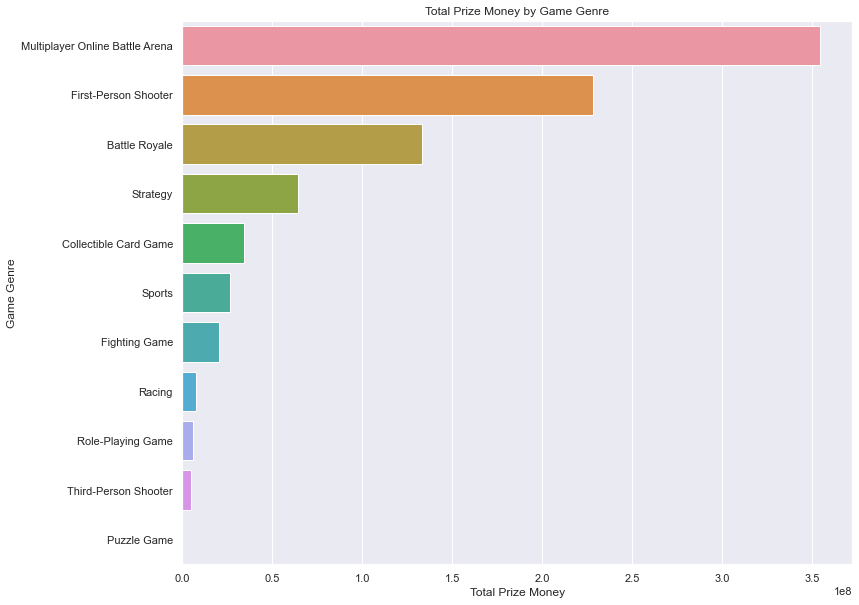

In [146]:
#Total prize money by genre
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})

# Create a horizontal bar chart of total prize money by game genre with bars in descending order
genre_order = esport.groupby(['Genre'])['TotalMoney'].sum().sort_values(ascending=False).index
sns.barplot(x="TotalMoney", y="Genre", data=esport, estimator=sum, ci=None, order=genre_order)
plt.title('Total Prize Money by Game Genre')
plt.xlabel('Total Prize Money')
plt.ylabel('Game Genre')
plt.show()

In [128]:
#Prize money vs year of release
year_prize_money = esport.groupby('Releaseyear')['TotalMoney'].sum().sort_values(ascending=False)
print(year_prize_money)

Releaseyear
2013    2.333863e+08
2017    1.393286e+08
2012    1.085794e+08
2009    7.927659e+07
2015    7.231075e+07
2016    4.906946e+07
2010    4.394318e+07
2014    3.945012e+07
2018    2.213570e+07
2019    1.733711e+07
2000    1.372929e+07
2004    1.210803e+07
2007    1.202871e+07
1998    8.259505e+06
2002    7.372909e+06
2020    4.488063e+06
2001    3.664526e+06
1999    2.998577e+06
2008    2.914646e+06
2005    2.156166e+06
2011    2.003740e+06
2003    1.260073e+06
2006    1.041683e+06
Name: TotalMoney, dtype: float64


In [129]:
#Number of active players vs year of release
# How does the release year of a game affect its total prize money and popularity in esports?
year_players = esport.groupby('Releaseyear')['PlayerNo'].sum().sort_values(ascending=False)
print(year_players)

Releaseyear
2012    14081
2017    10332
2015     7500
2009     7335
2016     6434
2014     6111
2013     5693
2010     5100
2007     4518
2018     4344
2000     4241
2020     3116
2019     2770
2004     2399
2001     2070
2008     1809
1999     1576
2011      909
2002      891
2003      771
1998      708
2005      517
2006      277
Name: PlayerNo, dtype: int64


In [130]:
#Games that are released in 2012 and 2017
year2012_games = esport['GameName'].loc[esport['Releaseyear'] == 2012]
year2017_games = esport['GameName'].loc[esport['Releaseyear'] == 2017]

print("Games released in 2012: \n", year2012_games.sort_values(ascending=False))
print("Games released in 2017: \n", year2017_games.sort_values(ascending=False))

Games released in 2012: 
 492                               Warsow
417              Street Fighter X Tekken
398                       Soul Calibur V
387                           Skullgirls
322            Pro Evolution Soccer 2013
306                      Persona 4 Arena
292                               NHL 13
281                        NBA 2K Online
247                      Madden NFL 2013
201                               Halo 4
189    Guilty Gear XX Accent Core Plus R
180                         Guild Wars 2
154                        FIFA Online 3
143                              FIFA 13
96                       Dead or Alive 5
85      Counter-Strike: Global Offensive
77                        Clash of Clans
57             Call of Duty: Black Ops 2
41             BlazBlue: Chronophantasma
38                           Blade& Soul
Name: GameName, dtype: object
Games released in 2017: 
 448              The Elder Scrolls: Legends
403                              Splatoon 2
382       

In [131]:
#Release year of game vs tournament prize money
# How does the release year of a game affect its total prize money and popularity in esports?
release_year_vs_tournaments = esport.groupby('Releaseyear')['TournamentNo'].sum().sort_values(ascending=False)
print(release_year_vs_tournaments)

Releaseyear
2010    7605
2012    5633
2014    3198
2015    3093
2001    2678
2009    2567
2013    2402
2018    1898
2017    1750
2016    1713
2002    1386
2000    1033
2007     911
1999     857
2004     611
2008     603
1998     582
2011     550
2020     488
2019     462
2005     227
2003     144
2006      66
Name: TournamentNo, dtype: int64


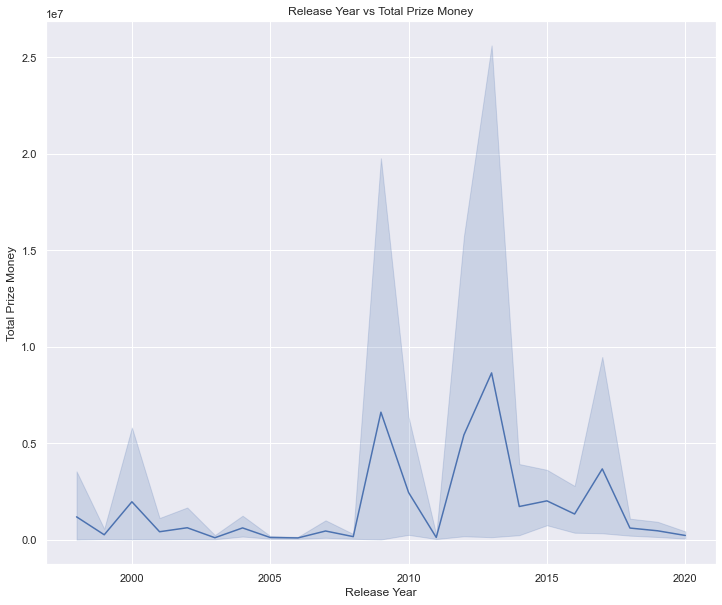

In [147]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})

# Create a scatter plot of release year vs total prize money
sns.lineplot(x="Releaseyear", y="TotalMoney", data=esport)
plt.title('Release Year vs Total Prize Money')
plt.xlabel('Release Year')
plt.ylabel('Total Prize Money')
plt.show()

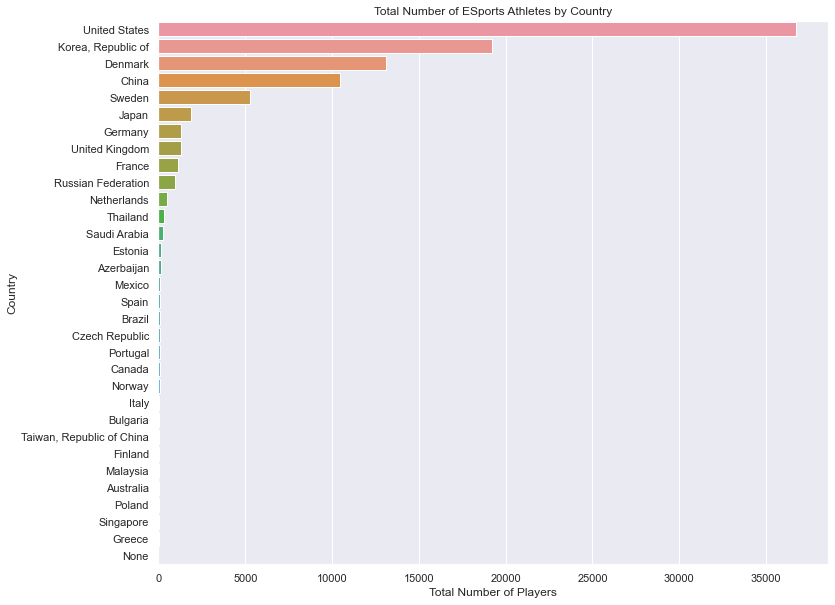

Top_Country
United States         36737
Korea, Republic of    19212
Denmark               13097
China                 10445
Sweden                 5279
Japan                  1897
Germany                1304
United Kingdom         1299
France                 1133
Russian Federation      953
Name: PlayerNo, dtype: int64


In [148]:
#Graphing out the total amount of players by country
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})

# Create a horizontal bar chart of total earnings by country with bars in descending order
players_per_country = esport.groupby(['Top_Country'])['PlayerNo'].sum().sort_values(ascending=False)
sns.barplot(x="PlayerNo", y="Top_Country", data=esport, estimator=sum, ci=None, order=players_per_country.index)
plt.title('Total Number of ESports Athletes by Country')
plt.xlabel('Total Number of Players')
plt.ylabel('Country')
plt.show()
print(players_per_country.head(10))

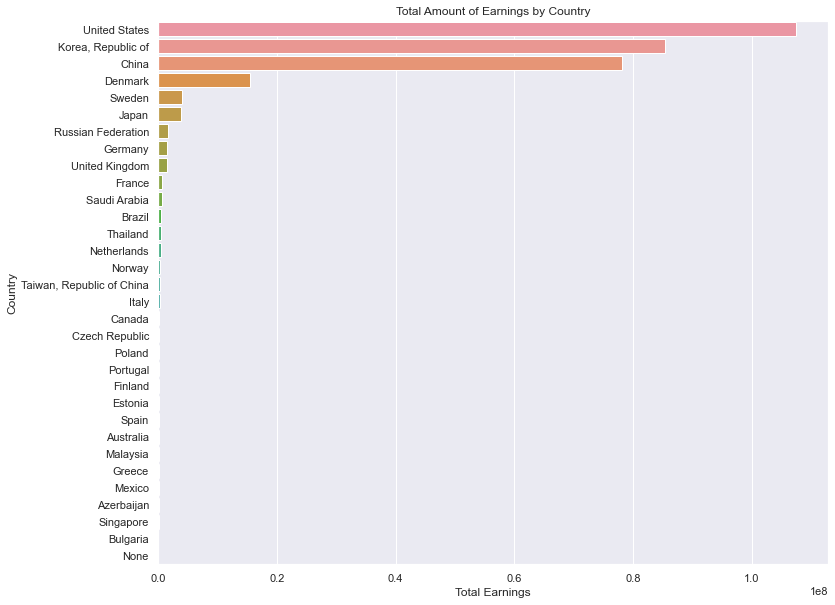

Top_Country
United States         1.075374e+08
Korea, Republic of    8.540854e+07
China                 7.820683e+07
Denmark               1.540062e+07
Sweden                4.031022e+06
Japan                 3.746896e+06
Russian Federation    1.675032e+06
Germany               1.474729e+06
United Kingdom        1.461288e+06
France                6.241203e+05
Name: Top_Country_Earnings, dtype: float64


In [149]:
#Graphing out the total amount of earnings by country
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
earnings_by_country = esport.groupby(['Top_Country'])['Top_Country_Earnings'].sum().sort_values(ascending=False)
sns.barplot(x="Top_Country_Earnings", y="Top_Country", data=esport, estimator=sum, ci=None, order=earnings_by_country.index)
plt.title('Total Amount of Earnings by Country')
plt.xlabel('Total Earnings')
plt.ylabel('Country')
plt.show()
print(earnings_by_country.head(10))

In [135]:
#Does top earning game genres differ by country?
earnings_per_genre_country = esport.groupby(['Genre', 'Top_Country'])['Top_Country_Earnings'].sum().sort_values(ascending=False)
print("Total earnings by genre and country:\n", earnings_per_genre_country)

Total earnings by genre and country:
 Genre                            Top_Country       
Multiplayer Online Battle Arena  China                 70532260.65
First-Person Shooter             United States         42313383.91
Battle Royale                    United States         36909310.86
Multiplayer Online Battle Arena  Korea, Republic of    32782359.83
Strategy                         Korea, Republic of    30867732.22
                                                          ...     
Fighting Game                    None                         0.00
                                 Saudi Arabia                 0.00
Battle Royale                    None                         0.00
Third-Person Shooter             None                         0.00
Collectible Card Game            None                         0.00
Name: Top_Country_Earnings, Length: 108, dtype: float64


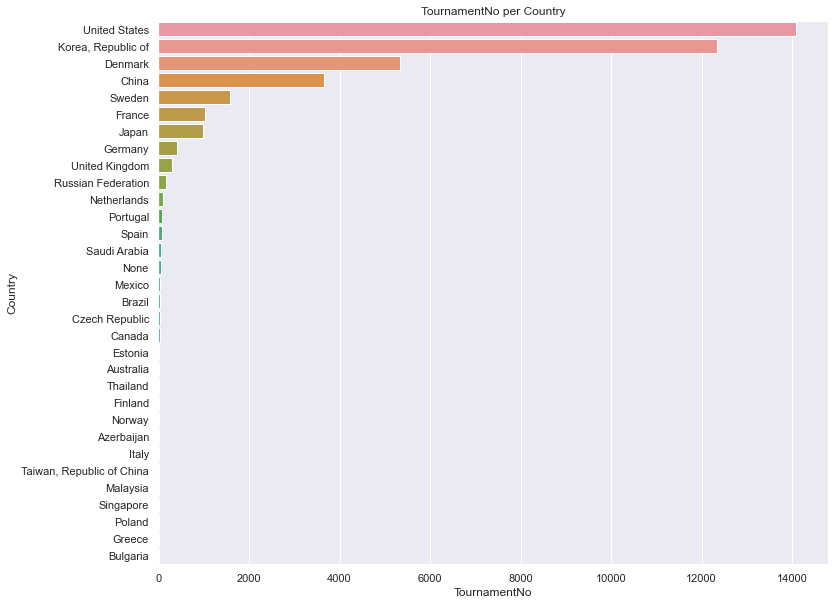

Top_Country
United States         14091
Korea, Republic of    12333
Denmark                5330
China                  3650
Sweden                 1572
France                 1028
Japan                   993
Germany                 419
United Kingdom          288
Russian Federation      158
Name: TournamentNo, dtype: int64


In [155]:
#Which countries host the most tournaments?
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
tournaments_per_country = esport.groupby(['Top_Country'])['TournamentNo'].sum().sort_values(ascending=False)
sns.barplot(x="TournamentNo", y="Top_Country", data=esport, estimator=sum, ci=None, order=tournaments_per_country.index)
plt.title('TournamentNo per Country')
plt.xlabel('TournamentNo')
plt.ylabel('Country')
plt.show()
print(tournaments_per_country.head(10))

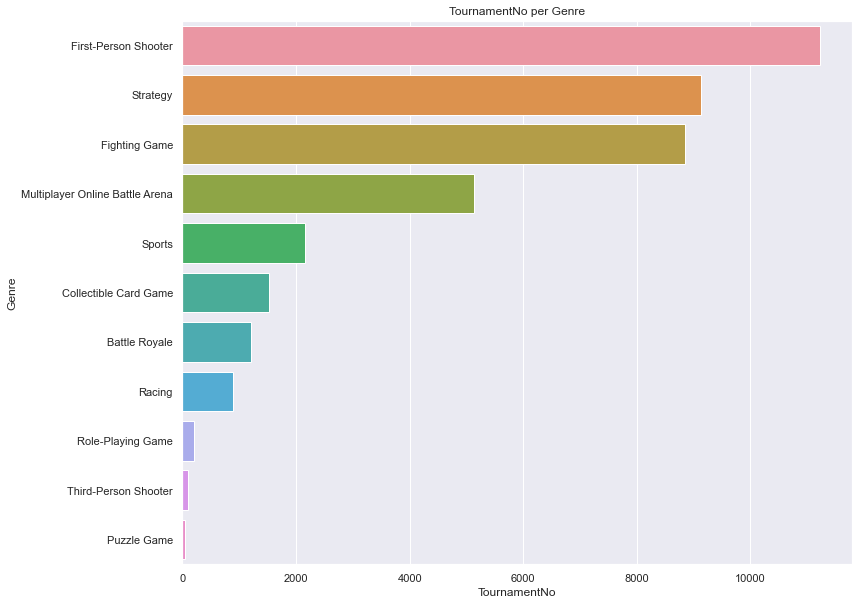

Genre
First-Person Shooter               11227
Strategy                            9126
Fighting Game                       8841
Multiplayer Online Battle Arena     5137
Sports                              2161
Collectible Card Game               1531
Battle Royale                       1203
Racing                               896
Role-Playing Game                    201
Third-Person Shooter                  91
Puzzle Game                           43
Name: TournamentNo, dtype: int64


In [156]:
#Which game genre has the highest number of tournaments
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
genre_vs_tournament_amount = esport.groupby(['Genre'])['TournamentNo'].sum().sort_values(ascending=False)
sns.barplot(x="TournamentNo", y="Genre", data=esport, estimator=sum, ci=None, order=genre_vs_tournament_amount.index)
plt.title('TournamentNo per Genre')
plt.xlabel('TournamentNo')
plt.ylabel('Genre')
plt.show()
print(genre_vs_tournament_amount)

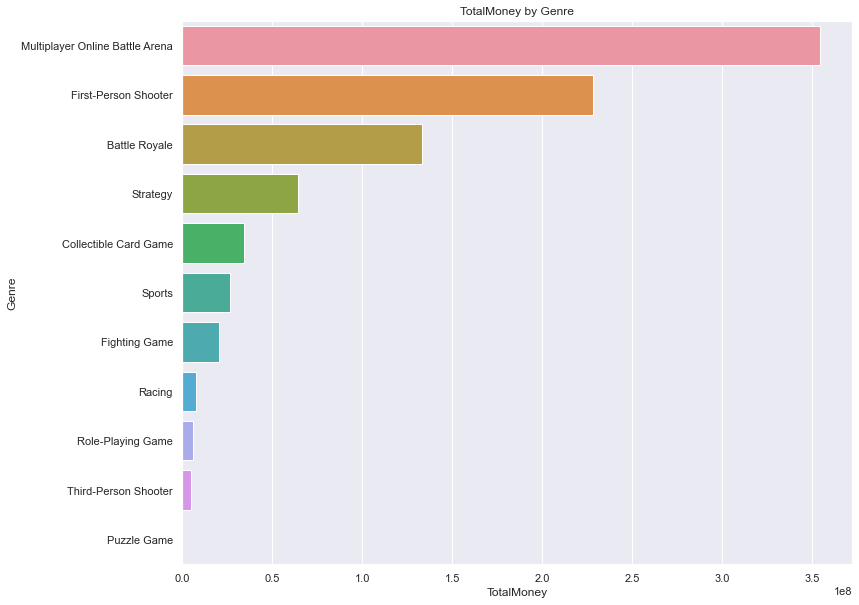

Genre
Multiplayer Online Battle Arena    3.542992e+08
First-Person Shooter               2.280892e+08
Battle Royale                      1.329225e+08
Strategy                           6.430371e+07
Collectible Card Game              3.427140e+07
Sports                             2.617880e+07
Fighting Game                      2.013167e+07
Racing                             7.753197e+06
Role-Playing Game                  5.968597e+06
Third-Person Shooter               4.901986e+06
Puzzle Game                        2.282659e+04
Name: TotalMoney, dtype: float64


In [152]:
#Which genre has the highest prize pool
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
genre_vs_earnings_amount = esport.groupby(['Genre'])['TotalMoney'].sum().sort_values(ascending=False)
sns.barplot(x="TotalMoney", y="Genre", data=esport, estimator=sum, ci=None, order=genre_vs_earnings_amount.index)
plt.title('TotalMoney by Genre')
plt.xlabel('TotalMoney')
plt.ylabel('Genre')
plt.show()
print(genre_vs_earnings_amount)

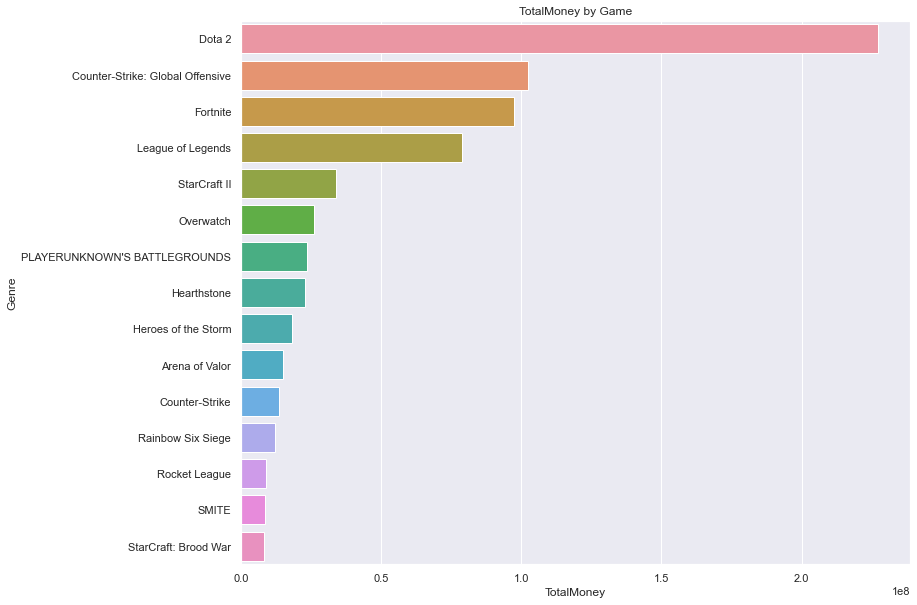

GameName
Dota 2                              2.274199e+08
Counter-Strike: Global Offensive    1.024743e+08
Fortnite                            9.750842e+07
League of Legends                   7.900345e+07
StarCraft II                        3.391406e+07
Overwatch                           2.604933e+07
PLAYERUNKNOWN'S BATTLEGROUNDS       2.371038e+07
Hearthstone                         2.309838e+07
Heroes of the Storm                 1.817798e+07
Arena of Valor                      1.522871e+07
Counter-Strike                      1.349423e+07
Rainbow Six Siege                   1.221453e+07
Rocket League                       9.171819e+06
SMITE                               8.640113e+06
StarCraft: Brood War                8.251181e+06
Name: TotalMoney, dtype: float64


In [154]:
#Which game has the highest prize pool
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,10)})
game_vs_earnings_amount = esport.groupby(['GameName'])['TotalMoney'].sum().sort_values(ascending=False)
sns.barplot(x="TotalMoney", y="GameName", data=esport, estimator=sum, ci=None, order=game_vs_earnings_amount.head(15).index)
plt.title('TotalMoney by Game')
plt.xlabel('TotalMoney')
plt.ylabel('Genre')
plt.show()
print(game_vs_earnings_amount.head(15))

Regression Model --> Prediction of factors that contribute to prize pool (TotalMoney)

In [139]:
#Splitting dataset
x = esport.loc[:, esport.columns != 'TotalMoney']
y = pd.DataFrame(esport['TotalMoney'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=1)

#dummify the variables
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [140]:
#Viewing shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(434, 481)
(49, 78)
(434, 1)
(49, 1)


In [141]:
#Training Algorithm
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [142]:
print(regressor.intercept_, regressor.coef_, regressor.score(x_train, y_train))


[24249052.02753459] [[ 5.26991602e+02  4.40238910e+03 -4.61288339e+03  3.02699974e+00
  -1.22606948e+04  2.34127883e+05  2.28527478e+05 -2.06219805e+06
   8.61902200e+05  2.77947472e+05  1.06476167e+06  8.16595409e+05
  -1.72838864e+06  2.29800095e+05  2.17038312e+05  2.46978438e+05
   1.88131395e+05 -3.57949923e+06 -2.21034883e+06 -7.42965678e+04
  -3.61489045e+04  1.23670191e+05 -1.11312662e+05 -5.79472835e+06
  -6.85707939e+05 -2.38349642e+05  2.02456902e+06  8.57002665e+05
   8.68843696e+05  9.39541943e+05  8.42784474e+05  5.64224887e+05
   5.17853664e+05  5.02415325e+05  9.82314621e+05  1.09225657e+06
   4.23412328e+05  2.37006514e+06  2.11511703e+05 -1.41631574e+05
  -9.99665816e+04  2.33839508e+05 -6.52486972e+04  3.31610651e+05
  -2.92687239e+04  1.04898263e+06  5.97593946e+05 -8.76915253e+05
  -7.69485517e+04 -4.19750493e+05  8.42149132e+05  1.12421910e+06
  -6.25533940e+05 -3.99726722e+06  3.04677197e+05 -9.90833069e+05
  -7.75406986e+06 -3.15230370e+06 -2.62140358e+05 -1.093

Conclusion:

1. The United States of America has the highest number of esports players, earnings and tournaments. Korea comes in second place.
2. First person shooters (genre) has the highest number of tournaments, but
3. Multiplayer Online Battle Arenas (Genre - MOBA) has the highest number of prize pool money (Dota2)
4. A regression model was made to determine which factors are important when predicting the prize pool of games (TotalMoney). It resulted in an adjusted R Squared score of 1.0